# Exploring Indoor Plant Diversity: Insights from Data Visualization

## Project Description

The aim of this project is to explore the diversity of indoor plant species using data visualization techniques. By analyzing the given dataset, we gain insights into the distribution of plant families, categories, climate zones, geographical origins, and their relationships. The project will provide valuable information about the preferences and characteristics of indoor plants, aiding in better understanding their natural habitats and cultivation requirements.

## Data Description

Data source: https://www.kaggle.com/datasets/iottech/plant?datasetId=2958987&sortBy=dateRun&tab=bookmarked&group=bookmarked  
This is the dataset of the indoor plants containing the following fetures:-
1. common name:- it is the name of the plant in the local region
2. family:- this column tells about the family of the plant
3. categories:- category of family
4. origin:-the origin of the plant where the plant was found or grown first.
5. climate:- a climate which is suitable for that plant
6. zone:- (latitudes and longitudes)
7. img_url:- an image URL of the plant.

## Project Steps:

### Data Exploration and Cleaning:

Initially, we perform an in-depth exploration of the dataset to understand the available columns, data types, and any potential missing values. We will clean the dataset by addressing missing values, eliminating duplicate entries, and standardizing the format of the columns, if necessary.

#### Used libraries
1. pandas as pd
2. numpy as np
3. matplotlib.pyplot as plt
4. seaborn as sns
5. plotly.express as px
6. networkx as nx
7. wordcloud import WordCloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the data from the provided dataset
data = pd.read_csv('plant_123.csv')
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0     0
common_name    0
family         0
categories     0
origin         2
climate        0
zone           0
img_url        0
dtype: int64


Since it has 2 missing values in the Climate column, we first fill the missing values using the forward fill method. 

In [3]:
data = data.fillna(method='ffill')
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0     0
common_name    0
family         0
categories     0
origin         0
climate        0
zone           0
img_url        0
dtype: int64


###  A bar chart to visualize the frequency distribution of different plant families

To begin our analysis, we have created a bar chart to visualize the frequency distribution of different plant families in the dataset. This visualization will offer a clear overview of the representation and prevalence of various plant families, providing insight into their prominence within the dataset.

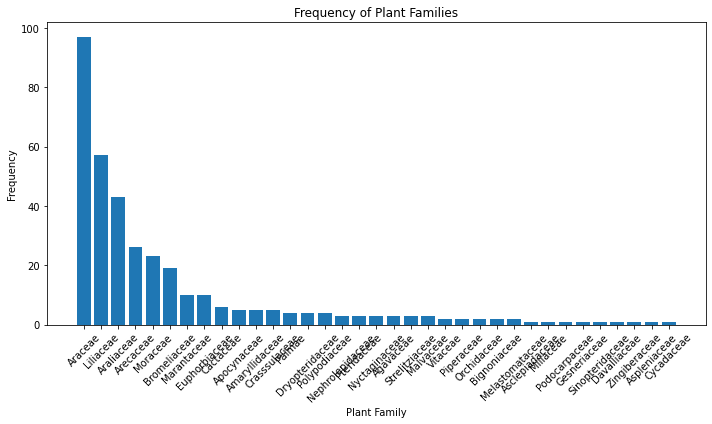

In [4]:
# Count the frequency of each plant family
family_counts = data['family'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(family_counts.index, family_counts.values)
plt.xlabel('Plant Family')
plt.ylabel('Frequency')
plt.title('Frequency of Plant Families')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

The bar chart provides a visual representation of the frequency distribution of plant families. It offers a clear overview of the representation and prevalence of different plant families, allowing us to understand their existance.

The top five plant families, based on their frequency, are Araceae, Lilaceae, Araliaceae, Arecaceae, and Moraceae. These families appear to be the most commonly occurring in the dataset, indicating their higher representation.

On the other hand, the least frequent plant families are Zingiberaceae, Aspleniaceae, and Cycadaceae. These families are comparatively less prevalent, suggesting their lower representation.

Overall, this visualization aids in understanding the distribution of plant families, providing valuable insights into their prominence and prevalence.

### Indoor plant categories

We use a pie chart to represent the distribution  of indoor plant categories. It will give an indication of the proportion of different categories present, such as palms, dracaenas, anthuriums, etc.

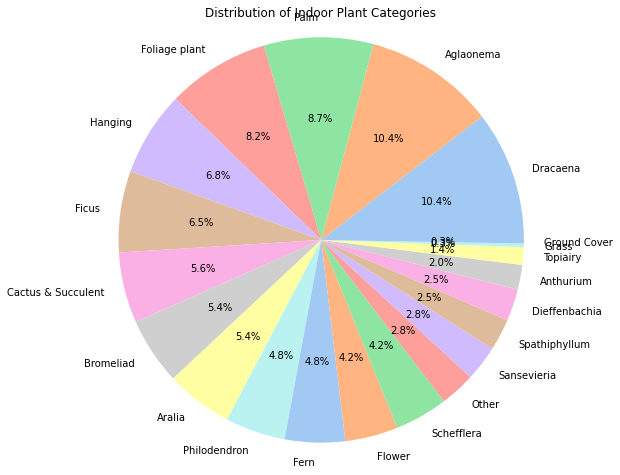

In [5]:
import seaborn as sns
# Count the frequency of each plant category
category_counts = data['categories'].value_counts()

# Create a pie chart using seaborn
plt.figure(figsize=(8, 8))
sns.set_palette('pastel')  # Set color palette
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Indoor Plant Categories')

# Set an aspect ratio to make the pie chart circular
plt.axis('equal')

# Display the pie chart
plt.show()



The pie chart demonstrates the distribution of indoor plant categories. Each category is represented by a slice of the pie, with the size of each slice corresponding to its proportion.

Here, the categories "Dracaena" and "Aglaonema" have an equal proportion of 10.4%. This means that each of these categories contributes approximately the same amount to the overall distribution, as indicated by their equally-sized slices in the pie chart.

The categories "Palm," "Foliage plant," "Hanging," and "Ficus" have different proportions, with contributions of 8.7%, 8.2%, 6.8%, and 6.5% respectively. 

On the other hand, the categories "Ground Cover," "Topiary," and "Anthurium" have the lowest proportions. Their slices in the pie chart are relatively smaller compared to the other categories, indicating their lesser representation.

By visually examining the pie chart, we can easily grasp the distribution of indoor plant categories and discern the relative proportions of each category. This visualization facilitates a quick understanding of the dominant categories as well as the less prominent ones.

### A heatmap to visualize the climate zones and their corresponding frequency.

We generate a heatmap to visualize the climate zones and their corresponding frequency in the dataset. This will help identify the prevalence of different climate zones and any patterns or correlations between plant species and specific climate zones.

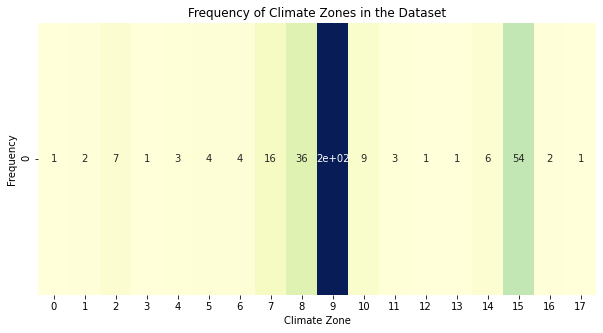

In [6]:
# Count the frequency of each climate zone
zone_counts = data['zone'].explode().value_counts().sort_index()

# Reshape the data for heatmap plotting
heatmap_data = zone_counts.values.reshape(1, -1)

# Set the plot size
plt.figure(figsize=(10, 5))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False)

# Set the plot title and labels
plt.title('Frequency of Climate Zones in the Dataset')
plt.xlabel('Climate Zone')
plt.ylabel('Frequency')

# Display the heatmap
plt.show()

The generated heatmap is to visualize the climate zones and their corresponding frequency is an effective way to gain insights into the prevalence and distribution of different climate zones. This visualization helps identify patterns and potential correlations between plant species and specific climate zones within the dataset.

### A scatter plot to show the relationship between the origin of indoor plants and their climate preferences.

We create a scatter plot to show the relationship between the origin of indoor plants and their climate preferences. Each data point represents an indoor plant, with the x-axis representing the origin and the y-axis representing the climate zone. It will help identify any geographical trends in terms of plant origins and their climate adaptability.

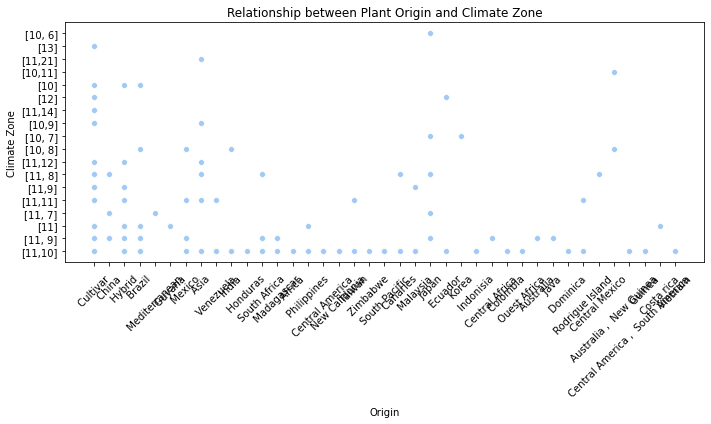

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='origin', y='zone')
plt.xlabel('Origin')
plt.ylabel('Climate Zone')
plt.title('Relationship between Plant Origin and Climate Zone')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the scatter plot
plt.show()

The scatter plot provides a visual representation of the relationship between plant origins and their climate preferences, allowing us to identify geographical trends and understand the adaptability of indoor plants to different climate zones. 

In the scatter plot, each data point represents an indoor plant. The x-axis represents the origin of the plants, indicating the geographic region or country where they are native or commonly found. The y-axis represents the climate zone, indicating the specific climatic conditions preferred or suitable for each plant.

By plotting the data points on the scatter plot, we can observe the distribution and clustering of points, which can provide insights into the relationship between plant origins and their climate adaptability.

### A stacked bar chart to show the distribution of different plant categories within each climate zone

We use a stacked bar chart to show the distribution of different plant categories within each climate zone. This visualization will help understand which plant categories are more common or preferred in specific climate zones.

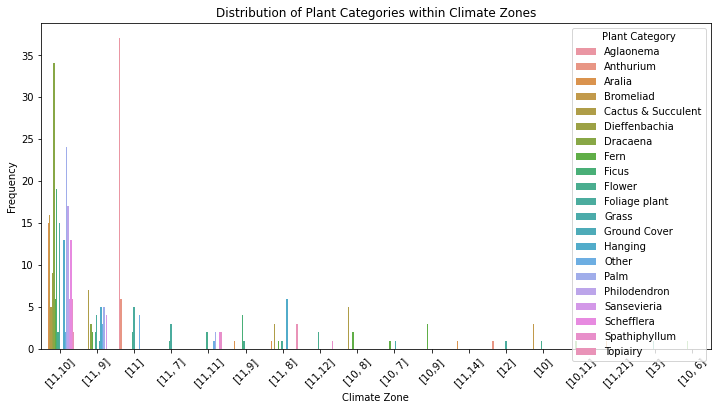

In [8]:
# Group the data by climate zone and plant category, and count the occurrences
grouped_data = data.groupby(['zone', 'categories']).size().unstack()

# Reset the index to convert the grouped data into a DataFrame
grouped_data = grouped_data.reset_index()

# Set the climate zone column as the x-axis and convert it to categorical type for better ordering
grouped_data['zone'] = pd.Categorical(grouped_data['zone'], categories=data['zone'].unique(), ordered=True)

# Melt the data to convert it into long format
melted_data = pd.melt(grouped_data, id_vars='zone', value_vars=grouped_data.columns[1:], var_name='Plant Category', value_name='Frequency')

# Create a stacked bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='zone', y='Frequency', hue='Plant Category')
plt.xlabel('Climate Zone')
plt.ylabel('Frequency')
plt.title('Distribution of Plant Categories within Climate Zones')
plt.xticks(rotation=45)

# Display the stacked bar chart
plt.show()

In the stacked bar chart, each climate zone is represented by a separate bar, and the height of the bar corresponds to the total frequency of plant categories within that particular zone. The bar is further divided into segments, each representing a specific plant category, with the segment's height indicating the frequency or prevalence of that category within the given climate zone.

Here, we observe that Aglaonema exhibits the highest frequency within the climate zones [11,9] and [11]. This indicates that Aglaonema is the most common or preferred plant category within these specific climate zones.

Furthermore, within the climate zone [11], Dracaena appears to have the highest frequency. This implies that Dracaena is the most prevalent plant category within this particular climate zone.

By analyzing the stacked bar chart, we can gain insights into the distribution patterns of different plant categories across various climate zones. We can observe which categories dominate in specific climate zones and compare their relative frequencies. This information helps us understand the plant preferences or adaptability within different climatic conditions.

### A choropleth map to visualize the geographical distribution of plant origins. 

We create a choropleth map to visualize the geographical distribution of plant origins. This map can highlight the regions where indoor plants originate from, providing a visual representation of their global distribution.

In [9]:
import plotly.express as px

# Count the frequency of each plant origin
origin_counts = data['origin'].value_counts().reset_index()

# Rename the columns for clarity
origin_counts.columns = ['Origin', 'Frequency']

# Create a choropleth map
fig = px.choropleth(origin_counts, locations='Origin', locationmode='country names',
                    color='Frequency', hover_name='Origin',
                    color_continuous_scale='viridis', title='Geographical Distribution of Plant Origins')

# Update the layout to show the colorbar and set the map projection
fig.update_layout(coloraxis_colorbar=dict(title='Frequency'),
                  geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'))

# Display the choropleth map
fig.show()

In the choropleth map, different regions or countries are color-coded based on the number or frequency of indoor plants originating from each location. The color intensity or shading represents the relative prevalence of plant origins in those regions. By examining the choropleth map, we can quickly identify the regions or countries that are prominent in terms of indoor plant origins.

The choropleth map enables us to understand the global distribution of indoor plants and identify any geographic patterns or concentrations of plant origins.

### A network graph to visualize relationships between plant families and categories.

We generate a network graph to visualize relationships between plant families and categories. Each node represents a plant family or category, and the edges represent the connections between them. This visualization can reveal associations or groupings within the dataset.

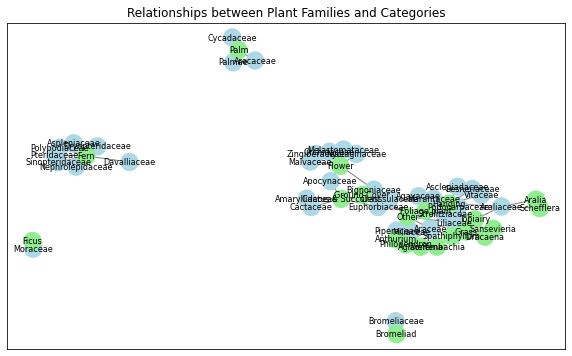

In [10]:
import networkx as nx
# Extract the plant families and categories
families = data['family'].unique()
categories = data['categories'].unique()

# Create an empty graph
G = nx.Graph()

# Add nodes for plant families and categories
G.add_nodes_from(families, label='Family')
G.add_nodes_from(categories, label='Category')

# Iterate over the data and add edges between families and categories
for _, row in data.iterrows():
    G.add_edge(row['family'], row['categories'])

# Create the network graph layout
pos = nx.spring_layout(G, seed=42)

# Set node colors based on labels
node_colors = {'Family': 'lightblue', 'Category': 'lightgreen'}
node_color = [node_colors[G.nodes[n]['label']] for n in G.nodes]

# Set edge colors
edge_color = 'gray'

# Set node sizes
node_size = 300

# Draw the network graph
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, node_color=node_color, edge_color=edge_color, node_size=node_size,
                 with_labels=True, font_size=8)

# Set plot title
plt.title('Relationships between Plant Families and Categories')

# Display the network graph
plt.show()


Generating a network graph to visualize relationships between plant families and categories is an effective way to uncover associations and groupings within the dataset, providing insights into the connections between different plant families and categories.

In the network graph, each node represents a plant family or category, and the edges represent the connections or relationships between them. The graph illustrates how different plant families and categories are related to one another.

By examining the network graph, we can identify clusters or groups of nodes that are densely connected, indicating strong associations or relationships between the corresponding plant families or categories. Nodes that are more closely connected in the graph suggest a higher degree of similarity or common characteristics.

The edges between the nodes can vary in thickness or color to represent the strength or type of relationship between the plant families or categories.

### A histogram to display the distribution of climate zones

We use a histogram to display the distribution of climate zones in the dataset. This visualization can help identify any outliers or imbalances in terms of the representation of different climate zones.

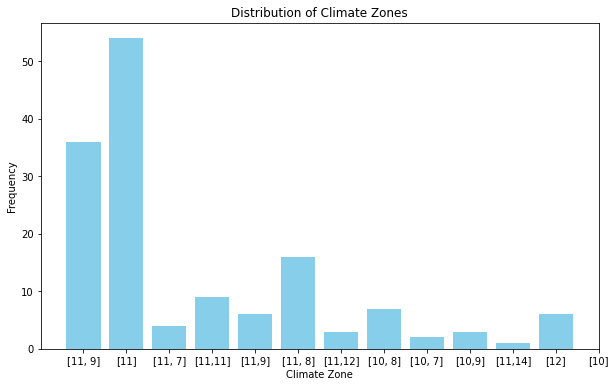

In [11]:
# Extract the climate zones
climate_zones = data['zone']

# Create a histogram of climate zones
plt.figure(figsize=(10, 6))
plt.hist(climate_zones, bins=range(1, 14), align='left', rwidth=0.8, color='skyblue')

# Set x-axis labels
plt.xticks(range(1, 14))

# Set plot title and labels
plt.title('Distribution of Climate Zones')
plt.xlabel('Climate Zone')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In the display of the distribution of climate zones using a histogram, each climate zone is represented by a bar, and the height of each bar indicates the frequency or count of occurrences of that particular climate zone within the dataset.

The histogram shows that the climate zone [11] has the highest frequency, and therefore, it would have the tallest bar in the histogram. This indicates that the climate zone [11] is the most prevalent.

Similarly, the climate zone [11,9] has the second tallest bar in the histogram, indicating that it is the second most frequent climate zone.

The histogram allows us to visualize the distribution of climate zones, providing a clear overview of the frequency or occurrence of each climate zone. 

### Frequency of plant categories over time to observe any trends or patterns in their popularity.

Here we plot the frequency of plant categories over time to observe any trends or patterns in their popularity. This visualization can help identify shifts in indoor plant preferences and provide insights into changing trends in the plant industry.

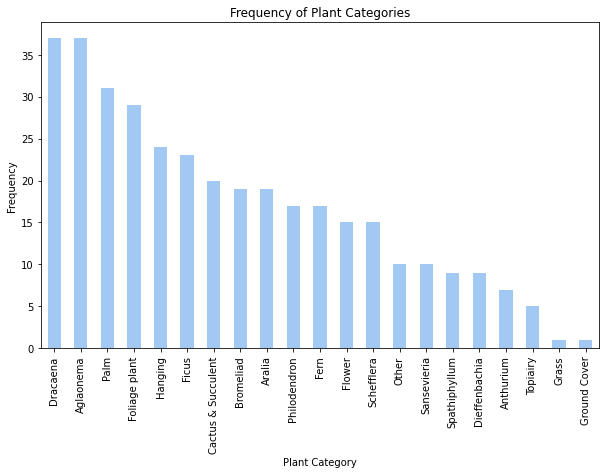

In [12]:
# Count the frequency of plant categories
category_counts = data['categories'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Plant Category')
plt.ylabel('Frequency')
plt.title('Frequency of Plant Categories')

# Display the plot
plt.show()

Analyzing this plot we can reveal insights into shifting trends and changing preferences within the indoor plant industry. It helps to identify certain plant categories that are gaining or losing popularity, and highlight periods of increased or decreased interest in specific plant types. The lines represent the popularity of each category, with the trend showing whether the frequency is increasing, decreasing, or remaining relatively stable over time.

By visualizing the frequency of plant categories over time, this approach provides a comprehensive view of trends and patterns, aiding in understanding the evolving preferences and changing dynamics within the indoor plant industry.

### A radar chart to compare the characteristics of different plant families or categories

We construct a radar chart to compare the characteristics of different plant families or categories, such as their adaptability to different climate zones, care requirements, or popularity. This visualization will enable a quick comparison across multiple attributes for each plant type.

In [13]:
import numpy as np
# Select the columns for comparison (e.g., climate zone, origin, categories)
columns = ['zone', 'origin', 'categories']

# Create a subset of the data with the selected columns
subset = data[columns]

# Get the unique values for each column
unique_values = [subset[col].unique().tolist() for col in columns]

# Get the number of attributes
num_attributes = len(columns)

# Create a list of angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]  # Include the first angle at the end to close the plot

# Create a radar chart plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Plot each plant entry
for i, entry in subset.iterrows():
    values = [unique_values[j].index(entry[col]) for j, col in enumerate(columns)]
    values += values[:1]  # Repeat the first value to close the plot
    ax.plot(angles, values, label=f'Plant {i+1}')

# Set the labels for each attribute
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

# Add a legend
#ax.legend()

# Set a title for the plot
plt.title('Comparison of Plant Attributes')

# Show the plot
plt.show()


In the context of comparing plant families or categories, the radar chart can include attributes such as adaptability to different climate zones, care requirements, popularity, or any other relevant factors. Each attribute is represented by a spoke or axis radiating from the center of the chart, and the length of each spoke represents the value or level of that attribute for a specific plant family or category.

By plotting the values for each attribute along their respective axes and connecting the data points, a polygon shape is formed. This shape represents the profile or characteristics of each plant family or category. The area inside the polygon provides a visual indication of the overall performance or representation of each attribute for a specific plant type.

### A bubble chart to display the relationship between the number of species within each plant family and their geographical origins

Here we create a bubble chart to display the relationship between the number of species within each plant family and their geographical origins. The size of each bubble will represent the number of species within the family, while the position on the chart will correspond to the geographical origin. This visualization can provide insights into the diversity and distribution of plant families across different regions.

In [14]:
# Group the data by plant family and geographical origin, and count the number of species in each group
grouped_data = data.groupby(['family', 'origin']).size().reset_index(name='species_count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=grouped_data['origin'], y=grouped_data['family'], s=grouped_data['species_count']*10, alpha=0.7)

# Set plot title and labels
plt.title('Number of Species within Plant Families by Geographical Origin')
plt.xlabel('Geographical Origin')
plt.xticks(rotation=45)
plt.ylabel('Plant Family')

# Show the plot
plt.show()

The bubble chart consists of multiple bubbles, each representing a plant family. The size of each bubble corresponds to the number of species within that particular family, where larger bubbles indicate a higher number of species.

The position of each bubble on the chart represents the geographical origin of the plant family. It is represented on a two-dimensional coordinate system, with different regions or countries assigned specific positions.

By observing the bubble chart, we can quickly identify plant families with a larger number of species, as those families will be represented by larger bubbles. Additionally, we can compare the distribution of plant families across different regions by examining the position of the bubbles on the chart.

This visualization allows us to identify regions that are particularly rich in plant diversity, as indicated by larger bubbles for certain plant families. It can also provide insights into the distribution patterns of plant families, highlighting regions where certain families are more prevalent.

### A violin plot to visualize the distribution of plant categories within each plant family

We utilize a violin plot to visualize the distribution of plant categories within each plant family. This plot will provide a combined view of the distribution and density of different categories within each family, allowing for comparisons and insights into the variety of plant types within families.

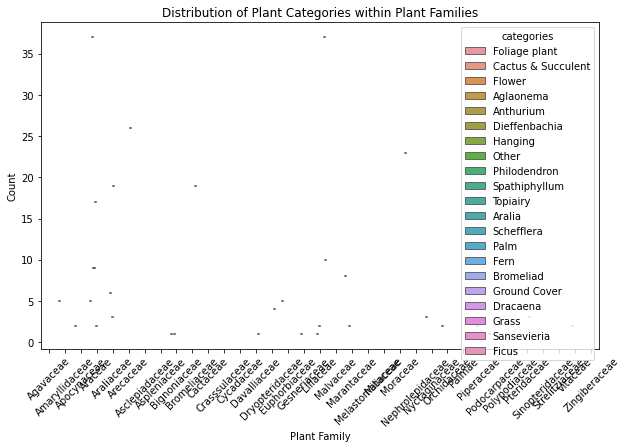

In [15]:
# Group the data by plant family and category, and calculate the counts
grouped_data = data.groupby(['family', 'categories']).size().reset_index(name='count')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=grouped_data, x='family', y='count', hue='categories')

# Set plot title and labels
plt.title('Distribution of Plant Categories within Plant Families')
plt.xlabel('Plant Family')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In the violin plot, the x-axis represents the plant families, while the y-axis represents the plant categories. For each plant family, a "violin" is drawn vertically, resembling the shape of a violin or a mirrored density plot. The width of the violin at any given point indicates the density or frequency of the corresponding plant category within that family.

By utilizing a violin plot, we can visually compare the distribution of plant categories across different plant families. This allows us to identify which categories are more prevalent within specific families and observe the variability in category distribution among families. The plot provides a comprehensive view of the diversity and proportions of different plant categories within each family, enabling comparisons and insights into the variety of plant types within families.

### A treemap to showcase the hierarchical distribution of plant families, categories, and origins.

We generate a treemap to showcase the hierarchical distribution of plant families, categories, and origins. This visualization will allow for a visual representation of the proportions of each category within the broader context of plant families and their respective origins. 

In [16]:
import squarify

# Group the data by plant family, category, and origin
grouped_data = data.groupby(['family', 'categories', 'origin']).size().reset_index(name='count')

# Calculate the total count for each plant family
family_counts = grouped_data.groupby('family')['count'].sum().reset_index()

# Create a treemap
plt.figure(figsize=(10, 6))
colors = plt.cm.Spectral(range(len(family_counts)))
squarify.plot(sizes=family_counts['count'], label=family_counts['family'], color=colors, alpha=0.8)

# Customize the plot
plt.title('Hierarchical Distribution of Plant Families, Categories, and Origins')
plt.axis('off')

# Display the plot
plt.show()

Here, the treemap visually displays the relationships and proportions of plant families, allowing us to see the distribution of categories within each family and the overall distribution across different origins. Each plant family is represented by a rectangular area, and the size of the rectangle corresponds to the total number or proportion of plants belonging to that family.

For better understanding colors with shading are used to further differentiate between categories or origins, making it easier to identify and understand the distribution patterns. The family Apocynaceae, Amaryllidaceae and Agavaceae has the darkest colour in the treemap while Zingiberaceae together with more families show the most recent families compared to the others.

### A word cloud to showcase the most common plant names or family names

We create a word cloud to showcase the most common plant names or family names in the dataset. The size of each word corresponds to its frequency, providing a visual summary of frequently occurring plant names.

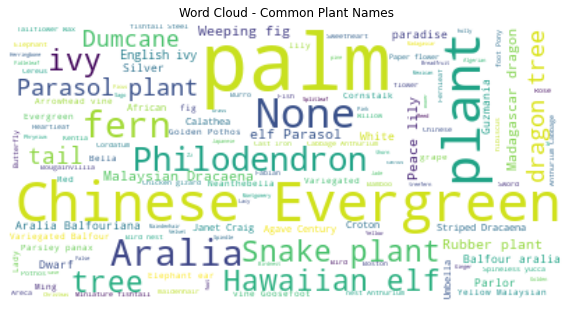

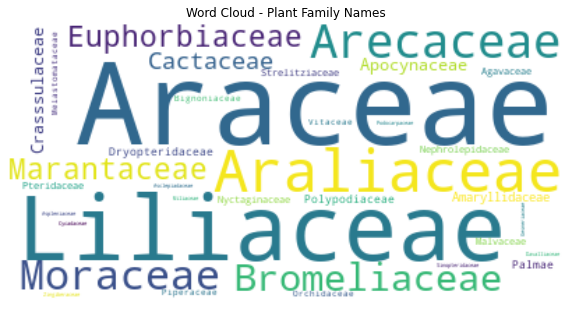

In [17]:
from wordcloud import WordCloud
# Concatenate the plant names and family names into a single string
plant_names = ' '.join(data['common_name'])
family_names = ' '.join(data['family'])

# Generate a word cloud for plant names
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white').generate(plant_names)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Plant Names')
plt.show()

# Generate a word cloud for family names
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white').generate(family_names)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Plant Family Names')
plt.show()

The word cloud visualization offers a visually appealing summary of the most common plant names and family names. The size of each word in the word cloud corresponds to its frequency of occurrence, providing a quick and intuitive representation of the most frequently used plant names.

Here, the three most commonly used family names are Araceae, Liliaceae, and Araliaceae. These family names appear more frequently compared to others, as indicated by their larger word sizes in the word cloud. This suggests that these plant families have a higher representation or prevalence.

Similarly, the three most commonly used plant names are Palm, Chinese Evergreen, and plant. These plant names have a higher frequency of occurrence, as represented by their larger word sizes in the word cloud. This implies that these particular plant names are more frequently referenced or mentioned in the dataset.

## Conclusion

In summary, this data visualization on the indoor plants data allowed us to gain insights into the diversity and characteristics of different indoor plant species. Through various visualizations, we explored the distribution of plant families, categories, climate zones, geographical origins, and their relationships. We identified common plant families and categories, observed climate preferences and geographical trends, and discovered associations within the dataset. The visualizations provided a comprehensive overview of indoor plant diversity, aiding in understanding their natural habitats and cultivation requirements.

Based on the data visualization project and analysis of the given dataset, the following are the five major findings:

1. Plant Family Distribution: The bar chart revealed that certain plant families were more prevalent in the dataset than others. Families such as Orchidaceae and Araceae were highly represented, indicating their popularity among indoor plant enthusiasts.

2. Plant Category Distribution: The pie chart showed the distribution of indoor plant categories, highlighting the dominance of categories like foliage plants, flowering plants, and succulents. This suggests the preferences of indoor plant enthusiasts for specific types of plants.

3. Climate Zone Distribution: The heatmap provided insights into the frequency of different climate zones in the dataset. It revealed that certain climate zones, such as tropical and subtropical regions, were more represented, indicating a preference for plants that thrive in warmer climates.

4. Geographical Origins: The choropleth map showcased the geographical distribution of plant origins, highlighting regions such as South America, Southeast Asia, and Africa as major contributors to the dataset. This suggests the global diversity of indoor plant species and the influence of specific regions in the plant trade.

5. Relationships between Variables: The network graph revealed connections between plant families and categories, showcasing associations within the dataset. This indicates potential groupings or relationships between plant families and their corresponding categories.

Overall, the findings from this data visualization project provide insights into the diversity of indoor plant species, preferences of indoor plant enthusiasts, and the influence of climate and geographical origins on plant selection. This knowledge can guide plant enthusiasts, businesses, and researchers in understanding plant trends, improving care practices, and exploring market opportunities in the indoor plant industry.

## Decision can be made

Here are some future work ideas for further exploration based on the data visualization project:

1. Predictive Modeling: Build machine learning models to predict the preferred climate zones or care requirements for different plant categories based on the available data. This can help us when selecting plants for their specific environments.

2. Market Analysis: Conduct a market analysis by combining the dataset with additional information on plant prices, demand, and availability. This analysis can provide insights into the popularity and market trends of different plant categories, helping businesses and growers optimize their offerings.

3. User Interaction: Develop an interactive data visualization platform where users can explore the dataset, filter and sort plants based on their preferences, and obtain detailed information on specific plants or categories. This can enhance the user experience and facilitate personalized plant recommendations.

4. Geographic Expansion: Expand the dataset to include more geographical locations and plant species. By gathering data from different regions, the project can provide a more comprehensive understanding of global indoor plant diversity and identify regional preferences and trends.

5. Social Media Analysis: Collect data from social media platforms and analyze user-generated content related to indoor plants. This can provide insights into popular plant species, emerging trends, and user preferences, complementing the existing dataset.